In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
ar= pd.read_csv("C://Users//91948//Downloads//ass 7//EastWestAirlines.csv")
ar

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
Scaler_ar_def = Scaler.fit_transform(ar.iloc[:,1:])
Scaler_ar_def

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

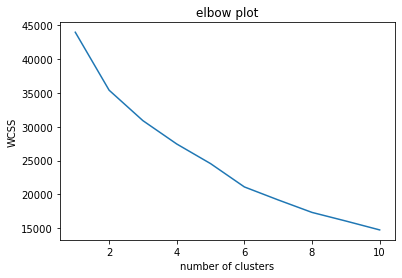

In [4]:
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(Scaler_ar_def)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("elbow plot")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

considering 3 clusters N=3, 

In [5]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3,random_state=0)
clusters_new.fit(Scaler_ar_def)

KMeans(n_clusters=3, random_state=0)

In [6]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
ar['cluster_id']= clusters_new.labels_

In [8]:
ar.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2235.212262,44370.730307,96.720605,1.237097,1.019014,1.000388,4837.902212,7.015134,200.463718,0.625534,3707.357004,0.204501
1,1,1601.309221,117627.582671,157.884738,3.732114,1.002385,1.038156,40499.723370,18.991256,346.263911,1.025437,4883.024642,0.652623
2,2,1723.621951,195200.231707,783.207317,2.152439,1.036585,1.000000,31379.963415,26.993902,5412.000000,15.798780,4715.945122,0.810976


theres a clear indication that the third clusters are having the highest rate of receiving the award and clusters 3 is performing well |

In [9]:
ar

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# The same data is used for hierarichal clustering

In [10]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

Normalization of data

In [11]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
df_norms= norm_func(ar.iloc[:,1:])

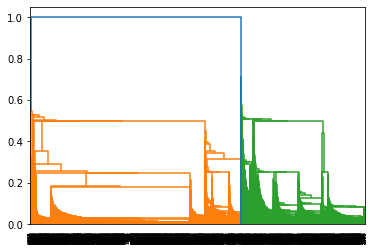

In [13]:
dendrogram = sch.dendrogram(sch.linkage(df_norms,method='single'))

In [14]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [15]:
y_hc= hc.fit_predict(df_norms)
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [16]:
df_norms['clusterhh_id']= hc.labels_

In [17]:
df_norms

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,clusterhh_id
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0.5,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0.0,1


# same data with dbscan

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [19]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  cluster_id         3999 non-null   int32
dtypes: int32(1), int64(12)
memory usage: 390.7 KB


In [20]:
array = ar.values

In [21]:
array

array([[    1, 28143,     0, ...,  7000,     0,     0],
       [    2, 19244,     0, ...,  6968,     0,     0],
       [    3, 41354,     0, ...,  7034,     0,     0],
       ...,
       [ 4019, 73597,     0, ...,  1402,     1,     1],
       [ 4020, 54899,     0, ...,  1401,     0,     0],
       [ 4021,  3016,     0, ...,  1398,     0,     0]], dtype=int64)

In [22]:
stscaler= StandardScaler().fit(array)
X=stscaler.transform(array)

In [23]:
dbscan = DBSCAN(eps=0.8,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [24]:
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [25]:
cl = pd.DataFrame(dbscan.labels_,columns=['clusters'])
cl

,clusters
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,2
3997,0


In [26]:
pd.concat([ar,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


# Problem no.2 Crime data of US 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [28]:
crd= pd.read_csv("C://Users//91948//Downloads//ass 7//crime_data.csv")
crd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler_crd= scaler.fit_transform(crd.iloc[:,1:])

C:\Users\91948\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


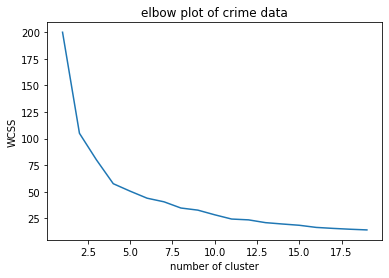

In [30]:
wcss=[]
for i in range(1,20):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_crd)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,20),wcss)
plt.title("elbow plot of crime data")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [31]:
from sklearn.cluster import KMeans
clusrters_new= KMeans(3,random_state=0)
clusters_new.fit(scaler_crd)

KMeans(n_clusters=3, random_state=0)

In [32]:
clusters_new.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [33]:
crd['cluster_id']=clusters_new.labels_

In [34]:
crd.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,12.331579,259.315789,68.315789,29.215789
2,2,6.016667,143.888889,72.333333,19.344444


therefore its clearly understood that cluster_id=1 has the highest mean values of crime rates ,followed by cluster_id=2 

# Hierarichal clust with same data set

In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [36]:
def norm_func(i):
    X=(i-i.min())/(i.max()-i.min())
    return(X)

df_norms= norm_func(crd.iloc[:,1:])

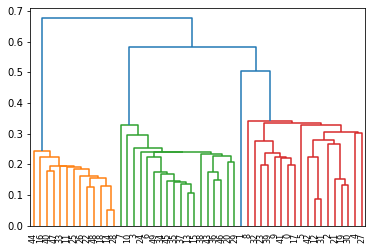

In [37]:
dendrogram= sch.dendrogram(sch.linkage(df_norms,method='single'))

In [38]:
hc= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
y_hc= hc.fit_predict(df_norms)

In [39]:
clusters= pd.DataFrame(y_hc,columns=['clusters'])

df_norms['clusters_id']=hc.labels_

In [40]:
df_norms

,Murder,Assault,UrbanPop,Rape,cluster_id,clusters_id
0,0.746988,0.654110,0.440678,0.359173,0.5,0
1,0.554217,0.746575,0.271186,0.961240,0.5,0
2,0.439759,0.852740,0.813559,0.612403,0.5,0
3,0.481928,0.496575,0.305085,0.315245,1.0,2
4,0.493976,0.791096,1.000000,0.860465,0.5,0
5,0.427711,0.544521,0.779661,0.811370,0.5,0
6,0.150602,0.222603,0.762712,0.098191,1.0,2
7,0.307229,0.660959,0.677966,0.219638,1.0,2
8,0.879518,0.993151,0.813559,0.635659,0.5,0
9,1.000000,0.568493,0.474576,0.478036,0.5,0


# DBSCAN clust 

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [42]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
 5   cluster_id  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 2.3+ KB


In [43]:
crd

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_id
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [44]:
df_ = crd.iloc[:,1:]
df_

,Murder,Assault,UrbanPop,Rape,cluster_id
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [45]:
stscaler= StandardScaler().fit(df_)
X=stscaler.transform(df_)


In [46]:
dbscan= DBSCAN(eps=0.9,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=6)

In [47]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  0, -1,  1,  0,  1, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        1,  1, -1,  1, -1, -1,  0, -1, -1, -1, -1,  1, -1, -1,  0,  1],
      dtype=int64)

In [48]:
db= pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [49]:
db

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,1
7,-1
8,-1
9,-1


In [50]:
pd.concat([df_,db],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster_id,cluster
0,13.2,236,58,21.2,1,-1
1,10.0,263,48,44.5,1,-1
2,8.1,294,80,31.0,1,-1
3,8.8,190,50,19.5,2,-1
4,9.0,276,91,40.6,1,-1
5,7.9,204,78,38.7,1,-1
6,3.3,110,77,11.1,2,1
7,5.9,238,72,15.8,2,-1
8,15.4,335,80,31.9,1,-1
9,17.4,211,60,25.8,1,-1
